In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
f = "../data/nba/team_season_data.csv"
df = pd.read_csv(f)

(0, 1)

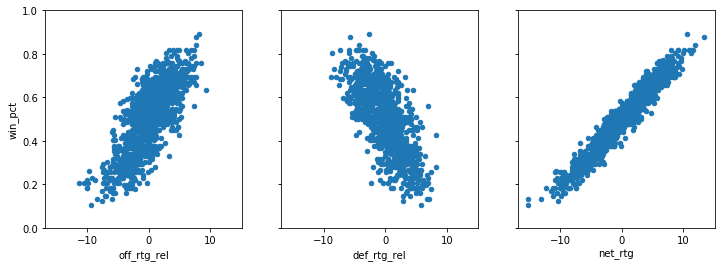

In [3]:
fig, axarr = plt.subplots(ncols=3, figsize=(12,4), sharey=True, sharex=True)
df.plot.scatter(ax=axarr[0], x='off_rtg_rel', y='win_pct')
df.plot.scatter(ax=axarr[1], x='def_rtg_rel', y='win_pct')
df.plot.scatter(ax=axarr[2], x='net_rtg', y='win_pct')
axarr[0].set_ylim((0, 1))

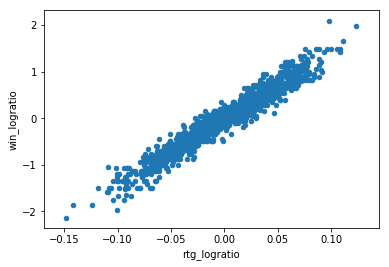

In [4]:
df.plot.scatter(x='rtg_logratio', y='win_logratio')

In [5]:
formula = 'win_logratio ~ rtg_logratio + 0'

In [6]:
results = smf.ols(formula, data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           win_logratio   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Thu, 16 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:34:14   Log-Likelihood:                 431.78
No. Observations:                1175   AIC:                            -861.6
Df Residuals:                    1174   BIC:                            -856.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
rtg_logratio    14.3530      0.110    130.363   

In [7]:
grps = df.groupby('year')
coefs = []
years = []
for year, grp in grps:
    years.append(year)
    results = smf.ols(formula, data=grp).fit()
    coefs.append(results.params['rtg_logratio'])

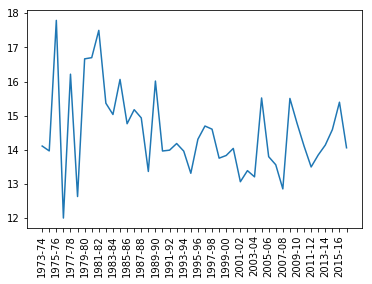

In [8]:
fig, ax = plt.subplots()
ax.plot(years, coefs)
plt.xticks(rotation=90);
k = 2
for i, tick in enumerate(ax.get_xticklabels()):
    tick.set_visible(False)
    if i % k == 0:
        tick.set_visible(True)